# Lambda Experiment

Determining the optimal value of $\lambda$ for EWC

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Importing results. Generated using instructions from README

In [2]:
lam0p5 = pd.read_csv('./results/lam0p5.csv')
lam1 = pd.read_csv('./results/lam1.csv')
lam5 = pd.read_csv('./results/lam5.csv')
lam10 = pd.read_csv('./results/lam10.csv')
lam25 = pd.read_csv('./results/lam25.csv')
lam100 = pd.read_csv('./results/lam100.csv')

In [3]:
lam0p5.columns

Index(['Metrics/EpRet', 'Metrics/EpCost', 'Metrics/EpLen',
       'Metrics/NominalEvalEpRet', 'Metrics/NominalEvalEpCost',
       'Metrics/NominalEvalEpLen', 'Metrics/LegEvalEpRet',
       'Metrics/LegEvalEpCost', 'Metrics/LegEvalEpLen', 'Train/Epoch',
       'Train/TotalSteps', 'Train/StopIter', 'Train/KL', 'Train/LR',
       'Loss/Loss_reward_critic', 'Loss/Loss_cost_critic', 'Loss/Loss_actor',
       'Loss/Loss_ewc', 'Time/Rollout', 'Time/Eval', 'Time/Update',
       'Time/Total', 'Value/RewardAdv', 'Value/CostAdv'],
      dtype='object')

Evaluating $\lambda$

Solid line is task A reward (nominal halfcheetah), dotted is task B (missing a leg)

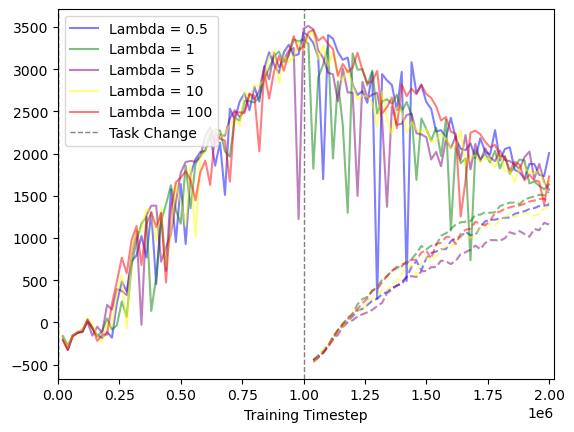

In [6]:
# Define a moving average function
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

# Smoothing parameters
window_size = 1 

plt.plot(lam0p5['Train/TotalSteps'][window_size-1:], moving_average(lam0p5['Metrics/NominalEvalEpRet'], window_size), color='blue', alpha=0.5, label='Lambda = 0.5')
plt.plot(lam0p5['Train/TotalSteps'][51:], lam0p5['Metrics/EpRet'][51:], color='blue', linestyle='--', alpha=0.5)

plt.plot(lam1['Train/TotalSteps'][window_size-1:], moving_average(lam1['Metrics/NominalEvalEpRet'], window_size), color='green', alpha=0.5, label='Lambda = 1')
plt.plot(lam1['Train/TotalSteps'][51:], lam1['Metrics/EpRet'][51:], color='green', linestyle='--', alpha=0.5)

plt.plot(lam5['Train/TotalSteps'][window_size-1:], moving_average(lam5['Metrics/NominalEvalEpRet'], window_size), color='purple', alpha=0.5, label='Lambda = 5')
plt.plot(lam5['Train/TotalSteps'][51:], lam5['Metrics/EpRet'][51:], color='purple', linestyle='--', alpha=0.5)

plt.plot(lam10['Train/TotalSteps'][window_size-1:], moving_average(lam10['Metrics/NominalEvalEpRet'], window_size), color='yellow', alpha=0.5, label='Lambda = 10')
plt.plot(lam10['Train/TotalSteps'][51:], lam10['Metrics/EpRet'][51:], color='yellow', linestyle='--', alpha=0.5)

plt.plot(lam100['Train/TotalSteps'][window_size-1:], moving_average(lam100['Metrics/NominalEvalEpRet'], window_size), color='red', alpha=0.5, label='Lambda = 100')
plt.plot(lam100['Train/TotalSteps'][51:], lam100['Metrics/EpRet'][51:], color='red', linestyle='--', alpha=0.5)

x_vals = range(0, max(lam100['Train/TotalSteps']) + 1, 1000000)
for i, x in enumerate(x_vals[:-1]):  
    plt.axvline(x=x, color='gray', linestyle='--', linewidth=1)

plt.axvline(x=-1, color='gray', linestyle='--', linewidth=1, label='Task Change')
plt.xlim(0,2020000)
plt.xlabel("Training Timestep")
plt.legend()

Choosing $\lambda=10$ because it seems to be the most stable while achieving reasonable task 2 reward.

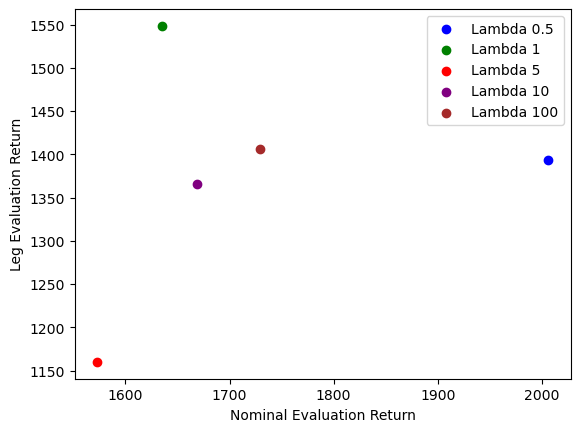

In [5]:
results = [lam0p5, lam1, lam5, lam10, lam100]
names = ['Lambda 0.5', 'Lambda 1', 'Lambda 5', 'Lambda 10', 'Lambda 100']

final_evals = [[res['Metrics/NominalEvalEpRet'].to_numpy()[-1], res['Metrics/EpRet'].to_numpy()[-1]] for res in results]
final_evals = np.array(final_evals)

# Define colors for each name
colors = {
    'Lambda 0.5': 'blue',
    'Lambda 1': 'green',
    'Lambda 5': 'red',
    'Lambda 10': 'purple',
    'Lambda 100': 'brown'
}

# Plot each point with its respective color
for i, name in enumerate(names):
    plt.scatter(final_evals[i, 0], final_evals[i, 1], color=colors[name], label=name)

# Add legend and labels
plt.xlabel('Nominal Evaluation Return')
plt.ylabel('Leg Evaluation Return')
plt.legend()
plt.show()